# Comparing statsmodels and pymer4 to the casadi approach for Linear Mixed Models

- 1 target
- 1 predictor
- 1 random intercept
- 0 "fixed" intercept

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import statsmodels

In [2]:
# from jmspack.NLTSA import flatten
flatten = lambda l: [item for sublist in l for item in sublist]

In [3]:
import casadi as ca

In [4]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [5]:
from scipy.stats import linregress
# from statsmodels.regression.linear_model import OLS

In [6]:
from pymer4 import Lmer

In [7]:
# from sklearn.datasets import make_regression
# from sklearn.linear_model import LinearRegression, Lasso

# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import train_test_split

In [8]:
tmp = os.getcwd()
os.chdir(tmp.split("/playground")[0])

# from romeo.romeo import ROMEO
# from romeo.utils import formula_parser

os.chdir(tmp)

# Statsmodels regularized mixedLM examples

In [9]:
data = sm.datasets.get_rdataset('dietox', 'geepack').data

In [10]:
data.head()

,Pig,Evit,Cu,Litter,Start,Weight,Feed,Time
0,4601,Evit000,Cu000,1,26.5,26.50000,NaN,1
1,4601,Evit000,Cu000,1,26.5,27.59999,5.200005,2
2,4601,Evit000,Cu000,1,26.5,36.50000,17.600000,3
3,4601,Evit000,Cu000,1,26.5,40.29999,28.500000,4
4,4601,Evit000,Cu000,1,26.5,49.09998,45.200001,5


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pig     861 non-null    int64  
 1   Evit    861 non-null    object 
 2   Cu      861 non-null    object 
 3   Litter  861 non-null    int64  
 4   Start   861 non-null    float64
 5   Weight  861 non-null    float64
 6   Feed    789 non-null    float64
 7   Time    861 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 53.9+ KB


In [12]:
# md = smf.mixedlm("Weight ~ Time", data, groups=data["Pig"])
# mdf = md.fit(method=["lbfgs"])
# mdf.summary()

In [13]:
target = "Weight"
fixed_effect = "Time"
grouping_var = "Pig"

In [14]:
md = smf.mixedlm(f"{target} ~ {fixed_effect}", 
                 data, 
                 groups=data[grouping_var], 
#                  re_formula=f"~{fixed_effect}"
                )
mdf = md.fit(method=["lbfgs"])
mdf.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
========================================================
Model:            MixedLM Dependent Variable: Weight    
No. Observations: 861     Method:             REML      
No. Groups:       72      Scale:              11.3669   
Min. group size:  11      Log-Likelihood:     -2404.7753
Max. group size:  12      Converged:          Yes       
Mean group size:  12.0                                  
--------------------------------------------------------
             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept    15.724    0.788  19.952 0.000 14.179 17.268
Time          6.943    0.033 207.939 0.000  6.877  7.008
Group Var    40.395    2.149                            
========================================================

"""

In [15]:
mdf.params

Intercept    15.723523
Time          6.942505
Group Var     3.553717
dtype: float64

In [16]:
mdf.fittedvalues

0      21.452990
1      28.395495
2      35.338000
3      42.280505
4      49.223010
         ...    
856    72.143115
857    79.085620
858    86.028125
859    92.970630
860    99.913135
Length: 861, dtype: float64

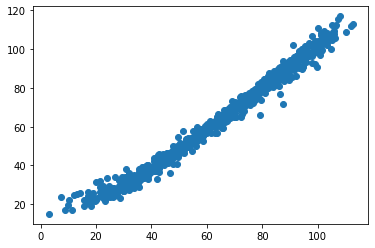

In [17]:
_ = plt.scatter(mdf.fittedvalues, data[target])

In [18]:
mdf.fe_params

Intercept    15.723523
Time          6.942505
dtype: float64

In [19]:
# import re

# formula_string = "Weight ~ Time + (1 + Time | Pig)"

# target = formula_string.replace(" ", "").split("~")[0]
# fixed_effect = formula_string.replace(" ", "").split("~")[1].split("+")[0]
# random_effects = re.findall("\((.*?)\)", formula_string)

# clusters = random_effects[0].replace(" ", "").split("+")[1].split("|")[1]

# {"target": target,
# "fixed_effect": fixed_effect,
# "random_effects": random_effects,
# "clusters": clusters}

# formula_parser(formula_string)

# Pymer4 version

In [69]:
formula_string = f"{target} ~ {fixed_effect} + (1 | {grouping_var})"
formula_string

'Weight ~ Time + (1 | Pig)'

In [70]:
mdp = Lmer(formula=formula_string, data=data, family='gaussian')

In [71]:
_ = mdp.fit(conf_int="profile")

Formula: Weight~Time+(1|Pig)

Family: gaussian	 Inference: parametric

Number of observations: 861	 Groups: {'Pig': 72.0}

Log-likelihood: -2404.775 	 AIC: 4809.551

Random effects:

                 Name     Var    Std
Pig       (Intercept)  40.394  6.356
Residual               11.367  3.371

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),15.724,14.171,17.276,0.788,83.003,19.952,0.0,***
Time,6.943,6.877,7.008,0.033,788.039,207.939,0.0,***


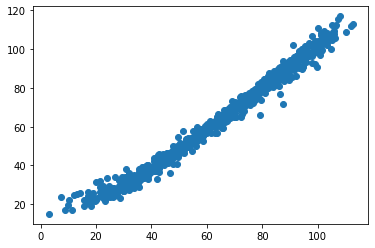

In [76]:
_ = plt.scatter(mdp.fits, data[target])

# LMM equation

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/e00ba9a8e13237ca374d55bb3070aebd12a5b8e4" />

In [20]:
y = data[target]
y.head(2)

0    26.50000
1    27.59999
Name: Weight, dtype: float64

In [21]:
x = data[[fixed_effect]]
x.head(2)

,Time
0,1
1,2


In [22]:
u = data[grouping_var].unique()

In [23]:
u

array([4601, 4602, 4603, 4605, 4641, 4643, 4645, 4756, 4757, 4759, 4760,
       4813, 4814, 4815, 4817, 4854, 4856, 4857, 4858, 5389, 5392, 5497,
       5500, 5501, 5502, 5524, 5527, 5528, 5578, 5581, 5582, 5850, 5851,
       5852, 5862, 5865, 5866, 6055, 6056, 6057, 6058, 6207, 6208, 6211,
       6284, 6287, 6288, 6430, 6432, 6433, 6909, 6910, 6912, 8049, 8050,
       8051, 8053, 8139, 8141, 8142, 8144, 8191, 8192, 8193, 8195, 8269,
       8270, 8271, 8273, 8437, 8439, 8442])

In [24]:
len(u)

72

In [25]:
data[grouping_var]

0      4601
1      4601
2      4601
3      4601
4      4601
       ... 
856    8442
857    8442
858    8442
859    8442
860    8442
Name: Pig, Length: 861, dtype: int64

In [26]:
data[grouping_var].value_counts().sort_index()

4601    12
4602    12
4603    12
4605    12
4641    12
        ..
8271    12
8273    12
8437    12
8439    12
8442    12
Name: Pig, Length: 72, dtype: int64

In [27]:
data[grouping_var].value_counts().sort_values()

5528    11
5524    11
5527    11
8141    12
8139    12
        ..
6288    12
8437    12
8439    12
8271    12
4645    12
Name: Pig, Length: 72, dtype: int64

In [28]:
z_list = list()
for cluster_group in u:
    tmp = data.loc[data[grouping_var]==cluster_group, grouping_var]
#     print(cluster_group)

#     np.pad(tmp, (tmp.index.tolist()[0], data[clusters].shape[0] - tmp.index.tolist()[-1]+1))
    
    z_list.append(np.pad(tmp, (tmp.index.tolist()[0], data[grouping_var].shape[0] - tmp.index.tolist()[-1]+1)))

In [29]:
z_list[1].shape

(863,)

In [30]:
possible_Z_df = pd.DataFrame(np.vstack(z_list).T)#.head(50)

In [31]:
possible_Z_df

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
0,4601,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4601,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4601,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4601,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4601,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8442
859,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8442
860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8442
861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
binary_df = np.where(possible_Z_df > 0 , 1, possible_Z_df)

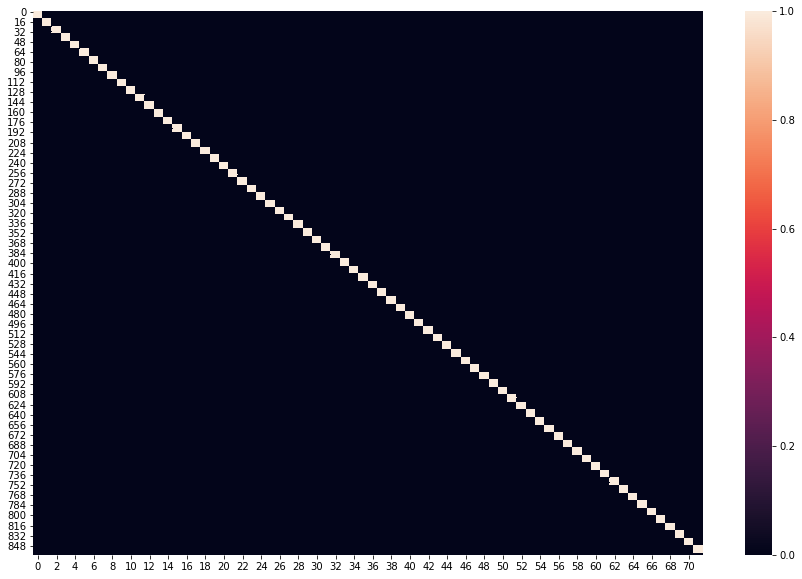

In [33]:
_ = plt.figure(figsize=(15, 10))
_ = sns.heatmap(binary_df)

In [34]:
# Z = possible_Z_df.loc[0: 860].values
Z = binary_df[0: 861]

In [35]:
Z

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/e00ba9a8e13237ca374d55bb3070aebd12a5b8e4" />

In [36]:
x.shape, y.shape

((861, 1), (861,))

In [37]:
x.head()

,Time
0,1
1,2
2,3
3,4
4,5


In [38]:
x.shape

(861, 1)

In [39]:
Z.shape

(861, 72)

In [40]:
y.values.reshape(-1, 1).shape

(861, 1)

In [41]:
data[target] 

0       26.50000
1       27.59999
2       36.50000
3       40.29999
4       49.09998
         ...    
856     73.19995
857     81.69995
858     90.29999
859     96.00000
860    103.50000
Name: Weight, Length: 861, dtype: float64

In [42]:
z_list = list()
for cluster_group in u:
    tmp = data.loc[data[grouping_var]==cluster_group, fixed_effect]
#     print(cluster_group)

#     np.pad(tmp, (tmp.index.tolist()[0], data[clusters].shape[0] - tmp.index.tolist()[-1]+1))
    
    z_list.append(np.pad(tmp, (tmp.index.tolist()[0], data[grouping_var].shape[0] - tmp.index.tolist()[-1]+1)))

In [43]:
z_list[1].shape

(863,)

In [44]:
possible_Z_slope_df = pd.DataFrame(np.vstack(z_list).T)[0: 861]#.head(50)

In [45]:
Z

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

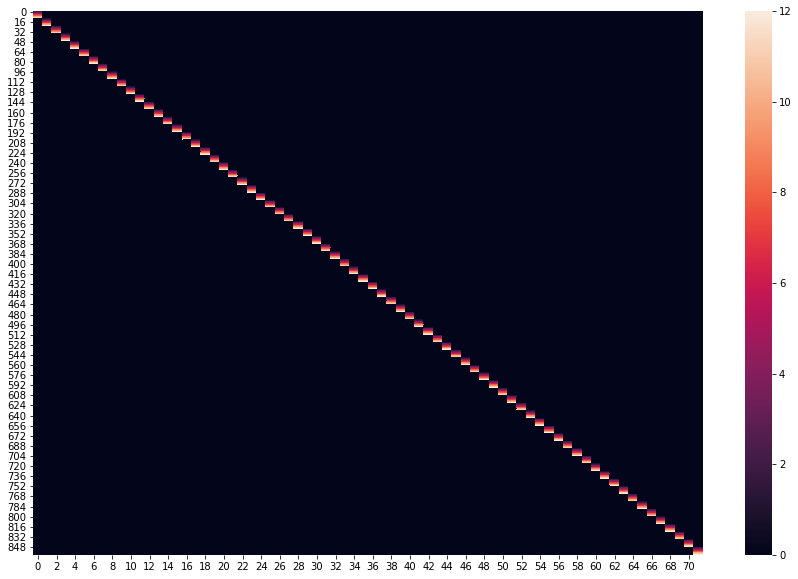

In [46]:
_ = plt.figure(figsize=(15, 10))
_ = sns.heatmap(possible_Z_slope_df)

In [47]:
Z.shape

(861, 72)

In [48]:
possible_Z_slope_df.values.shape

(861, 72)

In [80]:
# ntheta = x.shape[1]
ntheta_fixed = 1 #(time,)
ntheta_random = 72 #(amount of pigs groups)
theta_fixed = ca.SX.sym("theta_fixed", ntheta_fixed)
theta_random = ca.SX.sym("theta_random", ntheta_random)
# theta_random = ca.SX.sym("theta_random", ntheta_random*2)

alpha=1

model_method = "ols"

In [82]:
model_lmm = ca.mtimes(x.values, theta_fixed) + ca.mtimes(Z, theta_random)

In [83]:
# model_fixed = ca.mtimes(x.values, theta_fixed) + ca.mtimes(Z_random_intercept, theta_random) + ca.mtimes(Z_random_slope, theta_random)

In [84]:
# theta_random[0:ntheta_random]#.shape

In [86]:
# theta_random[ntheta_random:].shape

In [87]:
# model_lmm = ca.mtimes(x.values, theta_fixed) + ca.mtimes(Z, theta_random[0:ntheta_random]) + ca.mtimes(possible_Z_slope_df.values, theta_random[ntheta_random:])

In [88]:
# create residual
e = y.values.reshape(-1, 1) - model_lmm

In [89]:
# ca.vertcat([ntheta_fixed, ntheta_random])
# ca.vertcat(theta_fixed, theta_random)

In [91]:
# # create residual
# e = y - ca.mtimes(x, theta)


if model_method == "ols":
    # create optimization problem (x: optimization parameter, f: cost function)
    nlp = {"x": ca.vertcat(theta_fixed, theta_random), "f": 0.5 * ca.dot(e, e), }

elif model_method == "lasso":
    # CASE with regularization in cost function (LASSO)
    nlp = {"x": ca.vertcat(theta_fixed, theta_random), "f": 0.5*ca.dot(e, e) + 0.5*alpha*ca.sum1(ca.fabs(theta_fixed))}

else:
    # CASE with regularization in cost function (RIDGE)
    nlp = {"x": ca.vertcat(theta_fixed, theta_random), "f": 0.5*ca.dot(e, e) + 0.5*alpha*ca.dot(theta_fixed, theta_fixed)}

# solve opt
solver = ca.nlpsol("ols", "ipopt", nlp)
sol = solver(x0=np.zeros(ntheta_fixed + ntheta_random))
# sol = solver(x0=np.zeros(ntheta_fixed + ntheta_random*2))

theta_est = sol["x"]

# print(f"theta true: {coef}")
print(f"\ntheta comparison:\n {mdf.params}")
print(f"theta est: {theta_est}")

This is Ipopt version 3.14.2, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      145

Total number of variables............................:       73
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.8558161e+06 0.00e+00 1.00e+02  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

In [92]:
results = flatten(theta_est.toarray().tolist())
np.array(results)

array([ 6.94239799, 14.48273555, 18.88273138, 19.79938721, 22.67438971,
       25.09107388, 16.63272888, 20.24940055,  3.99940221, 16.57439221,
       12.56606471, -4.55060112, 18.28273138, 15.34939471, 15.00773305,
       18.14106471, 14.50773305, 22.30773305, 17.69939971, 18.11606138,
       10.89939388,  4.67439305, 10.97439888,  1.39106888, 21.94106888,
       21.64105805,  9.32742022, 14.94559477, 14.94560113, 23.01606721,
       18.14940471, 17.79939555,  9.54939721, 12.93273138, 19.18272971,
        8.53272721, 10.93273721,  9.13273805, 16.97439221, 29.12439888,
       20.56606555, 19.70773388, 17.89939221, 18.62439471, 19.79939388,
       13.47439888, 12.69939638, 14.87439805, 27.34939805, 14.76606305,
       24.08272555, 15.74939638, 16.14939471, 16.79939555, 12.05772638,
       22.98273305, 23.42439721, 16.27439638, 11.34939721,  9.87439055,
       15.13273805,  0.10773471, 18.67439471, 29.73273555, 15.65772638,
        5.79939721,  2.89106388, 16.88273388, 16.03273555, 20.84

In [93]:
mdf.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
========================================================
Model:            MixedLM Dependent Variable: Weight    
No. Observations: 861     Method:             REML      
No. Groups:       72      Scale:              11.3669   
Min. group size:  11      Log-Likelihood:     -2404.7753
Max. group size:  12      Converged:          Yes       
Mean group size:  12.0                                  
--------------------------------------------------------
             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept    15.724    0.788  19.952 0.000 14.179 17.268
Time          6.943    0.033 207.939 0.000  6.877  7.008
Group Var    40.395    2.149                            
========================================================

"""

In [94]:
mdp.summary()

Formula: Weight~Time+(1|Pig)

Family: gaussian	 Inference: parametric

Number of observations: 861	 Groups: {'Pig': 72.0}

Log-likelihood: -2404.775 	 AIC: 4809.551

Random effects:

                 Name     Var    Std
Pig       (Intercept)  40.394  6.356
Residual               11.367  3.371

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),15.724,14.171,17.276,0.788,83.003,19.952,0.0,***
Time,6.943,6.877,7.008,0.033,788.039,207.939,0.0,***


In [123]:
len(np.repeat(results[1:], repeats=12)[:-3])

861

In [122]:
len(Z)

861

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/e00ba9a8e13237ca374d55bb3070aebd12a5b8e4" />

In [134]:
# x.assign(intercept=1).set_index("intercept").reset_index() * results[0:2]
# x * results[0]
# np.dot(Z, np.repeat(results[1:], repeats=12)[:-3].reshape(1,-1))
Zu = np.dot(Z, results[1:])

In [140]:
XB = x * results[0]

In [144]:
fitted_values = XB.add(pd.Series(Zu), axis=0)

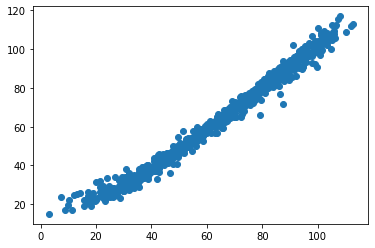

In [103]:
_ = plt.scatter(mdf.fittedvalues, data[target])

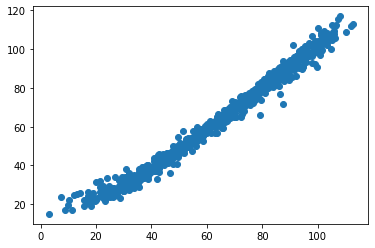

In [104]:
_ = plt.scatter(mdp.fits, data[target])

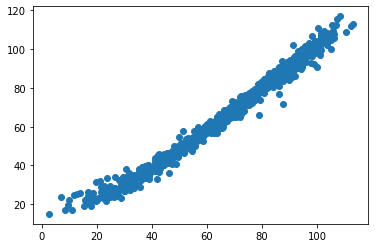

In [145]:
_ = plt.scatter(fitted_values, y)

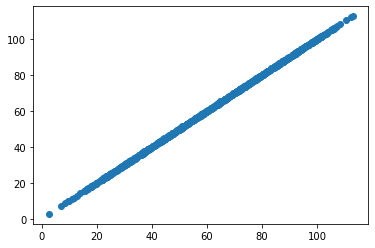

In [147]:
_ = plt.scatter(fitted_values, mdf.fittedvalues)

In [64]:
# order_of_estimates = fixed_intercept, fixed_coefficients, random_intercept, random_slope

In [65]:
len(results)

145

In [66]:
sol

{'f': DM(2164.56),
 'g': DM([]),
 'lam_g': DM([]),
 'lam_p': DM([]),
 'lam_x': DM([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'x': DM([-0.325975, 15.097, 15.8652, 17.8955, 19.9636, 16.5576, 18.4106, 20.9273, 4.11364, 21.9045, 14.553, 8.01363, 19.8242, 16.0091, 13.3515, 12.2485, 21.2879, 20.3561, 20.9409, 18.5303, 16.2364, 9.41818, 10.0318, 5.1394, 20.2576, 23.103, 12.4182, 19.3291, 14.5618, 19.1439, 14.8955, 18.6773, 12.4454, 9.05151, 13.2788, 11.1879, 14.3106, 11.7242, 16.3773, 24.3909, 16.903, 16.6015, 17.5091, 16.6909, 16.9727, 11.9636, 9.42727, 12.2, 27.9954, 7.11212, 18.3697, 13.3136, 14.8545,